# Steps to solve Emergency vs Non-Emergency vehicle classification problem

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [ ]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
import os
os.getcwd()

'/content'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the csv file
data = pd.read_csv('/content/drive/MyDrive/Dataset/emergency_classification.csv')

In [ ]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [ ]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [ ]:
# distribution of classes in the dataset
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [ ]:
type(data.image_names)

pandas.core.series.Series

In [ ]:
img = plt.imread('/content/drive/MyDrive/Dataset/images/0.jpg')

In [ ]:
type(img)

numpy.ndarray

In [ ]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('/content/drive/MyDrive/Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [ ]:
# shape of the image
X.shape

(2352, 224, 224, 3)

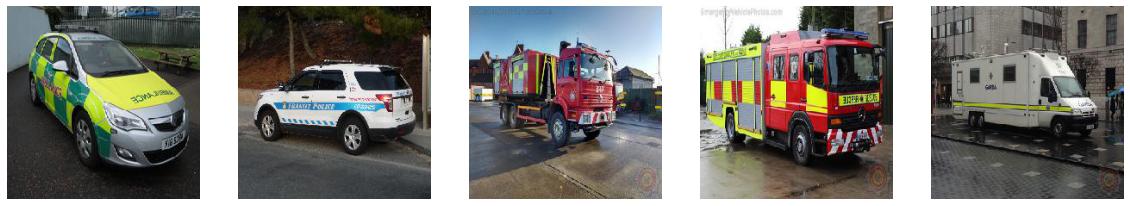

In [ ]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i])
    ax[i].axis('off')

## 2. Pre-processing the data

In [ ]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [ ]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [ ]:
# normalizing the pixel values
X = X / X.max()

In [ ]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [ ]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling the model

In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

## 6. Training the model

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 4s 158ms/step - loss: 0.8372 - accuracy: 0.5923 - val_loss: 0.6441 - val_accuracy: 0.6487
Epoch 2/50
13/13 [==============================] - 1s 93ms/step - loss: 0.6543 - accuracy: 0.6154 - val_loss: 0.6272 - val_accuracy: 0.6601
Epoch 3/50
13/13 [==============================] - 1s 94ms/step - loss: 0.6319 - accuracy: 0.6409 - val_loss: 0.6202 - val_accuracy: 0.6501
Epoch 4/50
13/13 [==============================] - 1s 101ms/step - loss: 0.6285 - accuracy: 0.6337 - val_loss: 0.6219 - val_accuracy: 0.6544
Epoch 5/50
13/13 [==============================] - 1s 100ms/step - loss: 0.6193 - accuracy: 0.6689 - val_loss: 0.5933 - val_accuracy: 0.6926
Epoch 6/50
13/13 [==============================] - 1s 94ms/step - loss: 0.6065 - accuracy: 0.6689 - val_loss: 0.6344 - val_accuracy: 0.6303
Epoch 7/50
13/13 [==============================] - 1s 105ms/step - loss: 0.5997 - accuracy: 0.6792 - val_loss: 0.5873 - val_accuracy: 0.6799
Epoch 8/5

## 7. Evaluating model performance

In [ ]:
# getting predictions in the form of class as well as probabilities
#predictions = model.predict_classes(X_valid)[:, 0]
#prediction_probabilities = model.predict(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)

In [ ]:
prediction = np.where(prediction_probabilities> 0.5,1,0)

In [ ]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, prediction), '%')

Accuracy on validation set: 0.6954674220963173 %


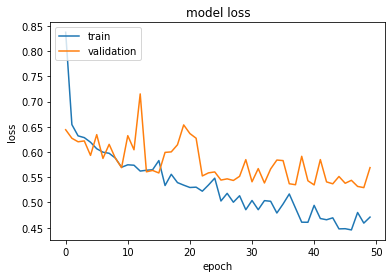

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

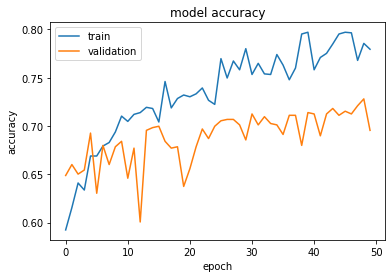

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is [73] % sure that it is emergency
And actual class is  1


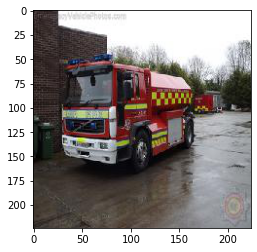

In [ ]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('/content/drive/MyDrive/Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

# Hyperparameter tuning of neural networks

<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>

### 1. Changing activation function of hidden layer

In [ ]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               15052900  
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 2s 125ms/step - loss: 1.8289 - accuracy: 0.5170 - val_loss: 0.6697 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 65ms/step - loss: 0.6802 - accuracy: 0.5674 - val_loss: 0.6794 - val_accuracy: 0.5949
Epoch 3/50
13/13 [==============================] - 1s 67ms/step - loss: 0.6581 - accuracy: 0.6166 - val_loss: 0.6397 - val_accuracy: 0.6218
Epoch 4/50
13/13 [==============================] - 1s 69ms/step - loss: 0.6401 - accuracy: 0.6166 - val_loss: 0.6153 - val_accuracy: 0.6700
Epoch 5/50
13/13 [==============================] - 1s 65ms/step - loss: 0.6224 - accuracy: 0.6555 - val_loss: 0.6567 - val_accuracy: 0.6105
Epoch 6/50
13/13 [==============================] - 1s 64ms/step - loss: 0.6146 - accuracy: 0.6695 - val_loss: 0.6072 - val_accuracy: 0.6827
Epoch 7/50
13/13 [==============================] - 1s 67ms/step - loss: 0.6235 - accuracy: 0.6549 - val_loss: 0.6106 - val_accuracy: 0.6686
Epoch 8/50
1

In [ ]:
# accuracy on validation set
prediction = np.where(model.predict(X_valid) > 0.5,1,0)
print('Accuracy on validation set:', accuracy_score(y_valid,prediction ), '%')

Accuracy on validation set: 0.5028328611898017 %


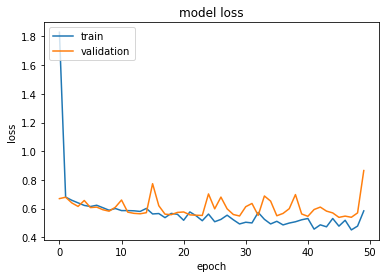

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 2. Increasing hidden neurons

In [ ]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              154141696 
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 154,142,721
Trainable params: 154,142,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 3s 192ms/step - loss: 1.4793 - accuracy: 0.5158 - val_loss: 0.9741 - val_accuracy: 0.4391
Epoch 2/50
13/13 [==============================] - 2s 127ms/step - loss: 0.6979 - accuracy: 0.5893 - val_loss: 0.6352 - val_accuracy: 0.6374
Epoch 3/50
13/13 [==============================] - 2s 130ms/step - loss: 0.6852 - accuracy: 0.5905 - val_loss: 0.6442 - val_accuracy: 0.6147
Epoch 4/50
13/13 [==============================] - 2s 130ms/step - loss: 0.6308 - accuracy: 0.6428 - val_loss: 0.6019 - val_accuracy: 0.6813
Epoch 5/50
13/13 [==============================] - 2s 128ms/step - loss: 0.6199 - accuracy: 0.6598 - val_loss: 0.6403 - val_accuracy: 0.6190
Epoch 6/50
13/13 [==============================] - 2s 130ms/step - loss: 0.6033 - accuracy: 0.6689 - val_loss: 0.6061 - val_accuracy: 0.6459
Epoch 7/50
13/13 [==============================] - 2s 126ms/step - loss: 0.6038 - accuracy: 0.6677 - val_loss: 0.5959 - val_accuracy: 0.6841
Epoch 

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid) > 0.5 ,1,0)), '%')

Accuracy on validation set: 0.6614730878186968 %


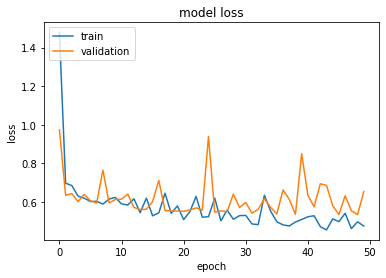

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 3. Increasing hidden layers

In [ ]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               15052900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 2s 148ms/step - loss: 0.6743 - accuracy: 0.5863 - val_loss: 0.6714 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 65ms/step - loss: 0.6610 - accuracy: 0.5942 - val_loss: 0.6647 - val_accuracy: 0.5652
Epoch 3/50
13/13 [==============================] - 1s 65ms/step - loss: 0.6513 - accuracy: 0.6130 - val_loss: 0.6486 - val_accuracy: 0.6558
Epoch 4/50
13/13 [==============================] - 1s 64ms/step - loss: 0.6448 - accuracy: 0.6464 - val_loss: 0.6421 - val_accuracy: 0.6586
Epoch 5/50
13/13 [==============================] - 1s 62ms/step - loss: 0.6379 - accuracy: 0.6531 - val_loss: 0.6367 - val_accuracy: 0.6686
Epoch 6/50
13/13 [==============================] - 1s 64ms/step - loss: 0.6343 - accuracy: 0.6580 - val_loss: 0.6350 - val_accuracy: 0.6487
Epoch 7/50
13/13 [==============================] - 1s 64ms/step - loss: 0.6300 - accuracy: 0.6537 - val_loss: 0.6284 - val_accuracy: 0.6629
Epoch 8/50
1

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid) > 0.5 ,1,0)), '%')

Accuracy on validation set: 0.7067988668555241 %


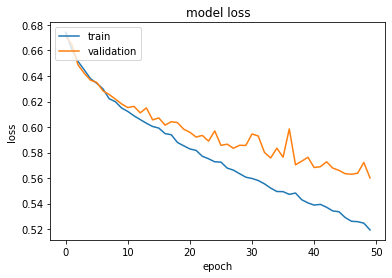

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 4. Increasing number of epochs

In [ ]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               15052900  
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 3s 155ms/step - loss: 0.8825 - accuracy: 0.5820 - val_loss: 0.6541 - val_accuracy: 0.6530
Epoch 2/100
13/13 [==============================] - 1s 65ms/step - loss: 0.6484 - accuracy: 0.6373 - val_loss: 0.6287 - val_accuracy: 0.6671
Epoch 3/100
13/13 [==============================] - 1s 66ms/step - loss: 0.6352 - accuracy: 0.6561 - val_loss: 0.6151 - val_accuracy: 0.6771
Epoch 4/100
13/13 [==============================] - 1s 63ms/step - loss: 0.6161 - accuracy: 0.6665 - val_loss: 0.6243 - val_accuracy: 0.6516
Epoch 5/100
13/13 [==============================] - 1s 63ms/step - loss: 0.5959 - accuracy: 0.6974 - val_loss: 0.5957 - val_accuracy: 0.7011
Epoch 6/100
13/13 [==============================] - 1s 63ms/step - loss: 0.6138 - accuracy: 0.6738 - val_loss: 0.6340 - val_accuracy: 0.6317
Epoch 7/100
13/13 [==============================] - 1s 63ms/step - loss: 0.6022 - accuracy: 0.6744 - val_loss: 0.5966 - val_accuracy: 0.6813
Epoch

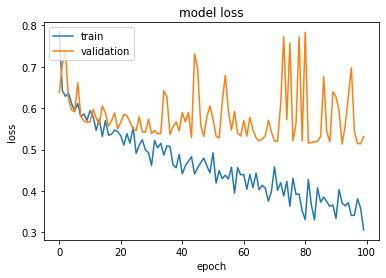

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 5. Changing the optimizer

In [ ]:
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [ ]:
# change optimizer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6765 - acc: 0.5936 - val_loss: 0.6585 - val_acc: 0.6431
Epoch 2/100
1646/1646 [==============================] - 2s 944us/step - loss: 0.6450 - acc: 0.6501 - val_loss: 0.6314 - val_acc: 0.6671
Epoch 3/100
1646/1646 [==============================] - 2s 968us/step - loss: 0.6273 - acc: 0.6610 - val_loss: 0.6205 - val_acc: 0.6686
Epoch 4/100
1646/1646 [==============================] - 2s 945us/step - loss: 0.6141 - acc: 0.6738 - val_loss: 0.6117 - val_acc: 0.6856
Epoch 5/100
1646/1646 [==============================] - 2s 974us/step - loss: 0.6057 - acc: 0.6926 - val_loss: 0.6148 - val_acc: 0.6671
Epoch 6/100
1646/1646 [==============================] - 2s 953us/step - loss: 0.5943 - acc: 0.7060 - val_loss: 0.6042 - val_acc: 0.6756
Epoch 7/100
1646/1646 [==============================] - 2s 962us/step - loss: 0.5849 - acc: 0.7126 - val_loss: 0.5945 - val_acc: 0.6

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7209631728045326 %


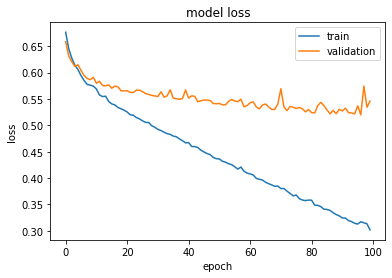

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

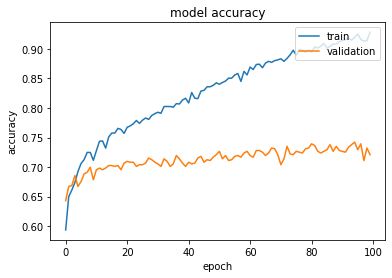

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()